# Importing libraries

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import random
import pandas as pd
import numpy as np
import uuid

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

### setting gpu growth

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
#setting gpu growth
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)

### Creating path

In [5]:
pospath = os.path.join('../data', 'positive')
negpath = os.path.join('../data', 'negative')
anchor = os.path.join('../data', 'anchor')

In [6]:
# os.makedirs(pospath)
# os.makedirs(negpath)
# os.makedirs(anchor)

## For accessing camera and to take postive and anchor pictures

In [7]:
# cap  = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()  
#     frame = frame[:360, :513, :]
#     cv2.imshow('image', frame)   
    
#     if cv2.waitKey(1) & 0XFF == ord('a'):
#         img = os.path.join(anchor, '{}.jpg'.format(uuid.uuid1()))
#         cv2.imwrite(img, frame)
        
#     if cv2.waitKey(1) & 0XFF == ord('p'):
#         img = os.path.join(pospath, '{}.jpg'.format(uuid.uuid1()))
#         cv2.imwrite(img, frame)
        
#     if cv2.waitKey(1) & 0XFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()    

## image processing (to get below 360x720px)

In [8]:
# for negimg in os.listdir(negpath):
#     img = cv2.imread(os.path.join(negpath, negimg))
#     img = cv2.resize(img, None, fx=0.731, fy=0.731)
#     cv2.imwrite(os.path.join(negpath, negimg), img)

In [9]:
# img = cv2.imread(r'data\negative\000_left_ear.jpg')

In [10]:
# plt.imshow(img)

## TO process image(rotate 90degree clockwise)

In [11]:
# for img in os.listdir(anchor):
#     a = cv2.imread(os.path.join(anchor, img))
#     a = cv2.rotate(a, cv2.ROTATE_90_CLOCKWISE)
#     cv2.imwrite(os.path.join(anchor, img), a)


In [12]:
# for directories in os.listdir("lfw"):
#     for files in os.listdir(os.path.join('lfw',directories)):
#         ex = os.path.join("lfw", directories, files)
#         new = os.path.join(negpath, files)
#         os.replace(ex, new)

## creating tf dataset from the data

In [13]:
def createdataset(path):
    return tf.data.Dataset.list_files(path+"/*.jpg").take(500) 

In [14]:
pos = createdataset(pospath)
neg = createdataset(negpath)
anch = createdataset(anchor)


In [15]:
print(pos, neg, anch, sep='\n')

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [16]:
test = pos.as_numpy_iterator()
test.next()

b'..\\data\\positive\\b2def294-d6a1-11ed-8c77-e45e37ecec6b.jpg'

In [17]:
tf.ones(len(anch))

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

## zipping the dataset as anchor with validation image and concatenating

In [18]:
positives = tf.data.Dataset.zip((anch, pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(anch)))))
negatives = tf.data.Dataset.zip((anch, neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anch)))))
rawdata = positives.concatenate(negatives)

In [19]:
print(positives, negatives, rawdata, sep='\n')

<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>
<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>
<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [20]:
test = rawdata.as_numpy_iterator()
test.next()

(b'..\\data\\anchor\\13be32e0-d6a2-11ed-89da-e45e37ecec6b.jpg',
 b'..\\data\\positive\\ec7d8cbf-d6a1-11ed-9ae8-e45e37ecec6b.jpg',
 1.0)

## image preprocessing

In [21]:
def preprocess(path):
    byteimg = tf.io.read_file(path)
    img = tf.io.decode_jpeg(byteimg)
    img = tf.image.resize(img, (105, 105))
    img /= 255.0
    return img

In [22]:
def preprocess_twin(inputimg, validationimg, label):
    return (preprocess(inputimg), preprocess(validationimg), label)

### then shuffling

In [23]:
data = rawdata.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [24]:
test = data.as_numpy_iterator()
test.next()

(array([[[0.03803922, 0.08873949, 0.0960224 ],
         [0.05577431, 0.09943978, 0.1517647 ],
         [0.02921168, 0.09074029, 0.1492277 ],
         ...,
         [0.99956787, 0.9997919 , 0.9838816 ],
         [0.99215686, 1.        , 0.9882353 ],
         [0.99215686, 1.        , 0.9882353 ]],
 
        [[0.05815126, 0.09566227, 0.10672268],
         [0.05494198, 0.09687874, 0.15014005],
         [0.02802721, 0.09805522, 0.15267706],
         ...,
         [0.98702663, 0.9939655 , 0.98310506],
         [0.99607843, 0.99607843, 0.9882353 ],
         [0.99607843, 0.99607843, 0.9882353 ]],
 
        [[0.05402161, 0.09631852, 0.10164065],
         [0.04817928, 0.10308123, 0.15266106],
         [0.03521409, 0.10824331, 0.16266508],
         ...,
         [0.994958  , 0.9971989 , 0.9882353 ],
         [0.9932773 , 0.99887955, 0.9882353 ],
         [0.99607843, 0.99607843, 0.9882353 ]],
 
        ...,
 
        [[0.11260507, 0.1086835 , 0.13221292],
         [0.11372549, 0.10980392, 0.13333

## splitting train and test data

In [25]:
len(data)

1000

In [26]:
train_data = data.skip(round(len(data)*.7))

In [27]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [28]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## Embedding layer

In [29]:
def make_embedding(): 
    inp = Input(shape=(105,105,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [30]:
embedding = make_embedding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

## L1dist layer


In [31]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
    def call(self, input_emb, validation_emb):
        return tf.math.abs(input_emb - validation_emb)

In [32]:
inputimg = Input(name='input_img', shape=(105, 105, 3))
validationimg = Input(name='val_img', shape=(105, 105, 3))
print(inputimg, validationimg, sep='\n')

KerasTensor(type_spec=TensorSpec(shape=(None, 105, 105, 3), dtype=tf.float32, name='input_img'), name='input_img', description="created by layer 'input_img'")
KerasTensor(type_spec=TensorSpec(shape=(None, 105, 105, 3), dtype=tf.float32, name='val_img'), name='val_img', description="created by layer 'val_img'")


In [33]:
siameselayer = L1Dist()


In [34]:
inputembedding = embedding(inputimg)
validationembedding = embedding(validationimg)
print(inputembedding, validationembedding, sep='\n')

KerasTensor(type_spec=TensorSpec(shape=(None, 4096), dtype=tf.float32, name=None), name='embedding/dense/Sigmoid:0', description="created by layer 'embedding'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4096), dtype=tf.float32, name=None), name='embedding/dense/Sigmoid:0', description="created by layer 'embedding'")


In [35]:
distances = siameselayer(inputembedding, validationembedding)
distances

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist')>

In [36]:
classifier = Dense(1, activation='sigmoid')(distances)
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [37]:
testnetwork = Model(inputs=[inputimg, validationimg], outputs=classifier, name='SiameseNetwork')
testnetwork

## siamese model(embedding+l1dist)

In [38]:
def make_siamese_model():
    inputimg = Input(name='inputimg', shape=(105, 105, 3))
    validationimg = Input(name='validationimg', shape=(105, 105, 3))
    siameselayer = L1Dist()
    siameselayer._name = 'distance'
    distances = siameselayer(embedding(inputimg), embedding(validationimg))
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[inputimg, validationimg], outputs=classifier, name='SiameseNetwork')
    

In [39]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputimg (InputLayer)       [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validationimg (InputLayer)  [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['inputimg[0][0]',            
                                                          8          'validationimg[0][0]']       
                                                                                                  
 distance (L1Dist)           (None, 4096)                 0         ['embedding[2][0]

## loss function and optimizer

In [40]:
bcl = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4)

## creating checkpoints

In [41]:
checkpointdir = '../checkpoints'
checkpointprefix = os.path.join(checkpointdir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## training the model (step function which train each batch)

In [42]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        X = batch[:2]
        Y = batch[2]
        y_pred = siamese_model(X, training=True)
        loss = bcl(Y, y_pred)
    print(loss)
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss

## loop that train the entire batch by sending to train_step()

In [43]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print("\n EPOCH : {}/{}".format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)
        if epoch%10==0:
            checkpoint.save(file_prefix=checkpointprefix)

## Training the model

In [44]:
# EPOCHS = 50
# print(train(train_data, EPOCHS))


In [45]:
# siamese_model.save('siamese.h5')

## Run the Pretrained 


In [46]:
model = tf.keras.models.load_model('siamese.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossEntropy':tf.losses.BinaryCrossentropy})

In [47]:
from tensorflow.keras.metrics import Recall, Precision

In [48]:
testinput, testval, ytrue = test_data.as_numpy_iterator().next()

In [49]:
ypred = model.predict([testinput, testval])

1/1 [==============================] - 3s 3s/step


In [50]:
ypred = [1 if prediction>0.5 else 0 for prediction in ypred]

In [51]:
ypred

[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]

In [52]:
ytrue

array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

In [53]:
m = Recall()
m.update_state(ytrue, ypred)
m.result().numpy()

1.0

In [54]:
m = Precision()
m.update_state(ytrue, ypred)
m.result().numpy()

1.0

In [55]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 2s 2s/step
1.0 1.0


Accuracy: 1.00
Precision: [0.4375 1.     1.    ]
Recall: [1. 1. 0.]
F1 Score: 1.0
Specificity: 1.0
Matthews Correlation Coefficient (MCC): 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



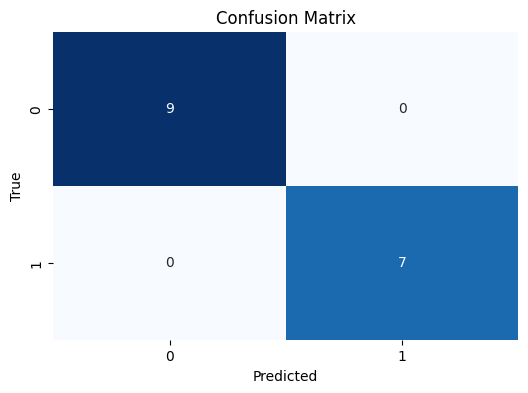

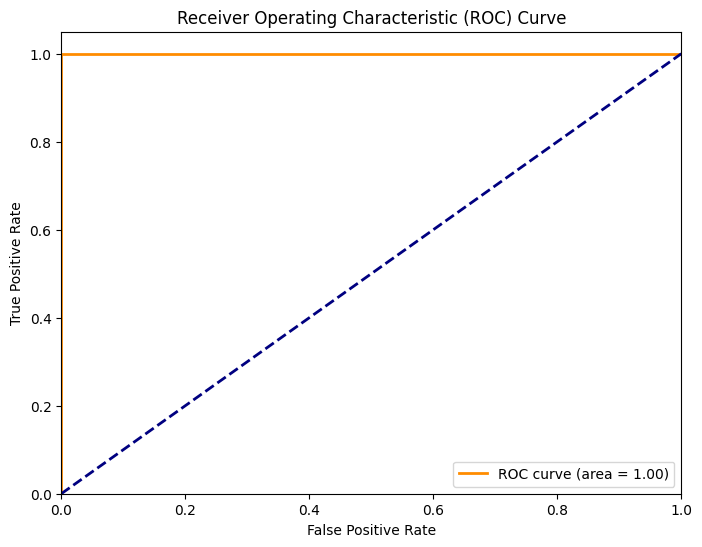

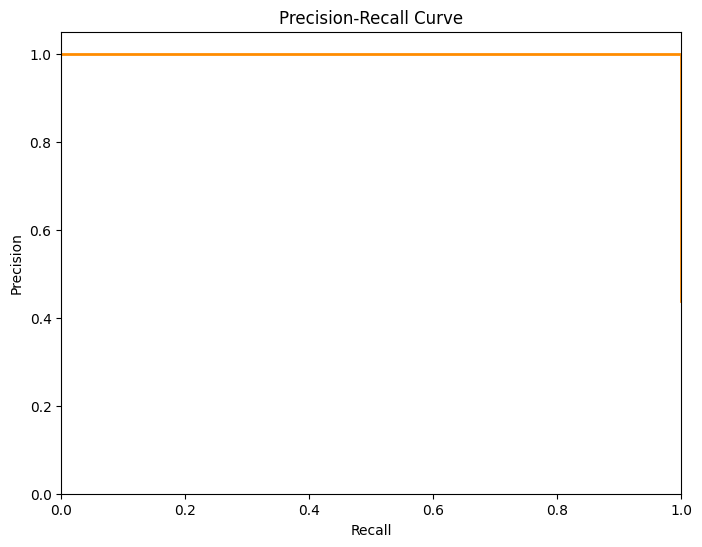

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, matthews_corrcoef

# Binary classification threshold
threshold = 0.5

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
cm = confusion_matrix(ytrue, [1 if pred > threshold else 0 for pred in ypred])

tn, fp, fn, tp = cm.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate Precision, Recall (Sensitivity), F1 Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Specificity
specificity = tn / (tn + fp)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(ytrue, ypred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(ytrue, ypred)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(ytrue, [1 if pred > threshold else 0 for pred in ypred])

# Print performance measures
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

# Print Classification Report
report = classification_report(ytrue, [1 if pred > threshold else 0 for pred in ypred])
print(report)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Show the plots
plt.show()


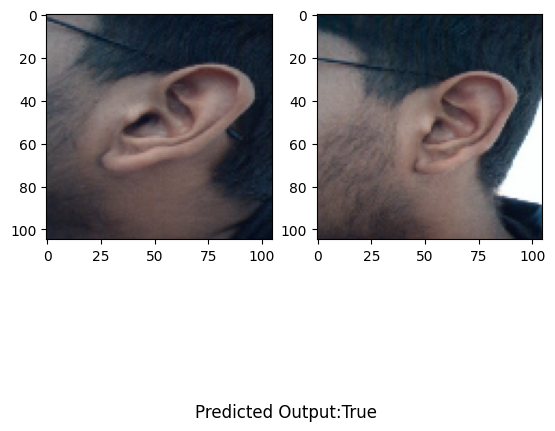

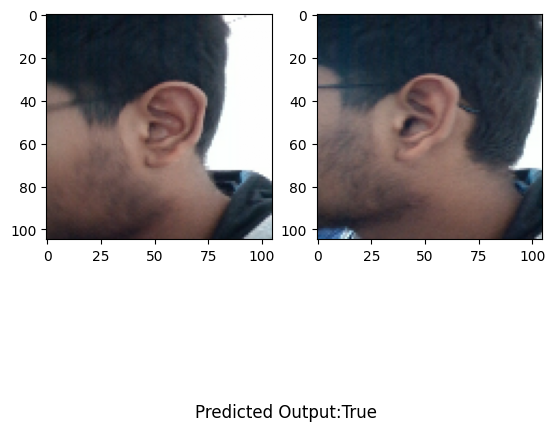

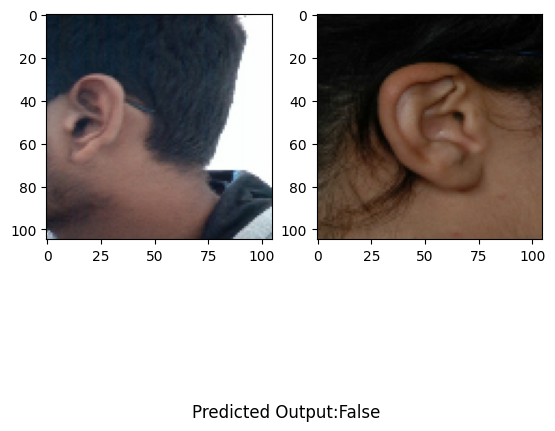

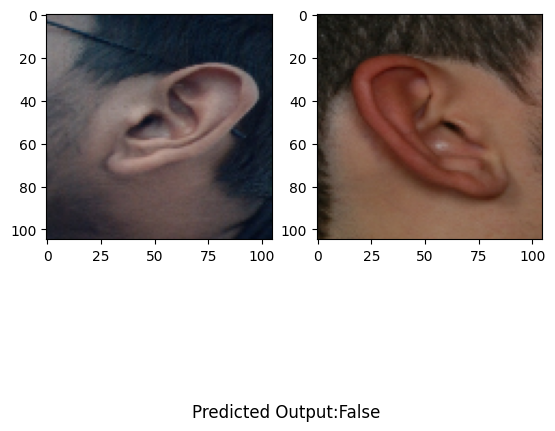

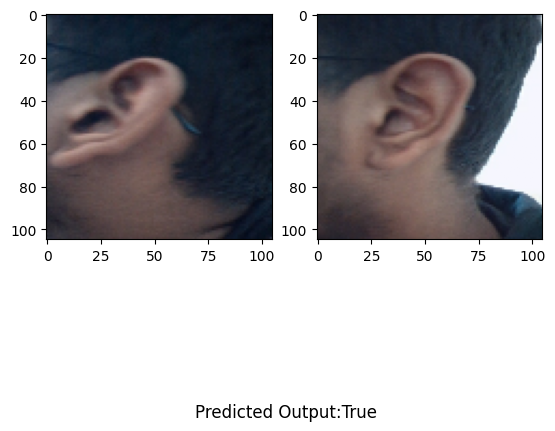

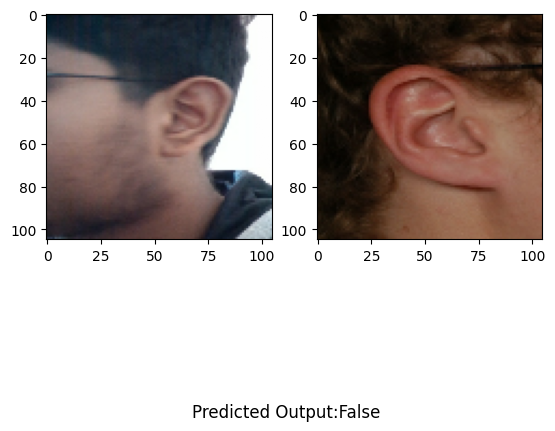

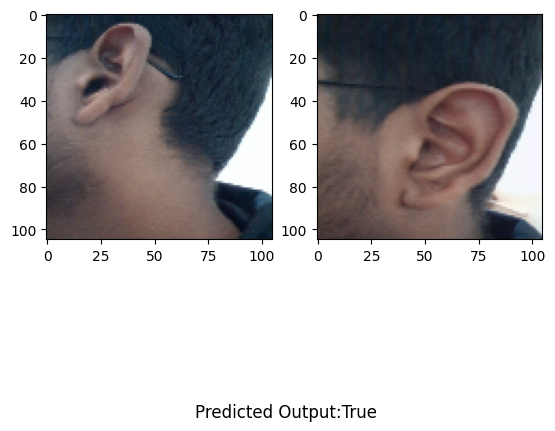

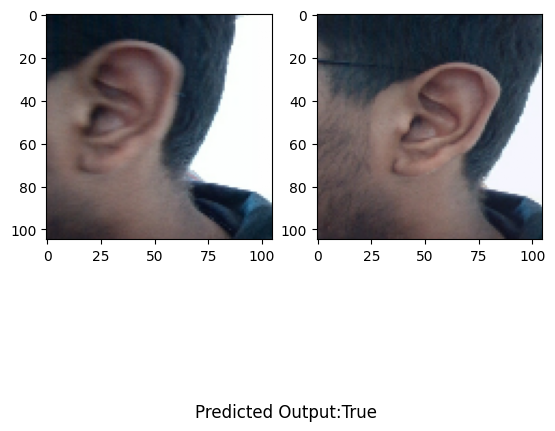

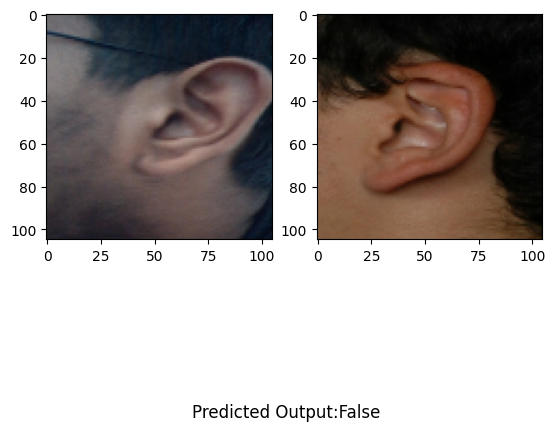

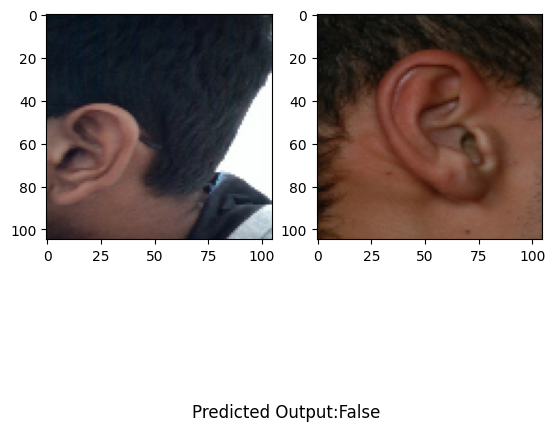

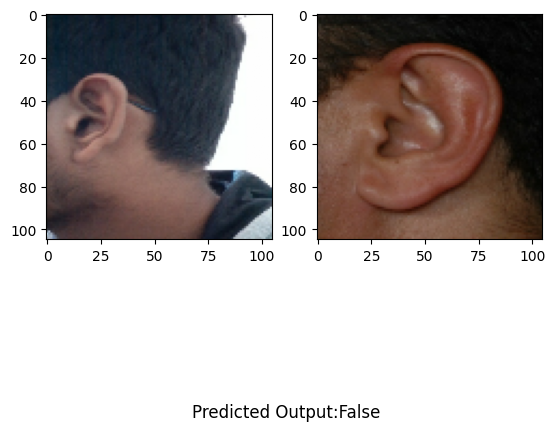

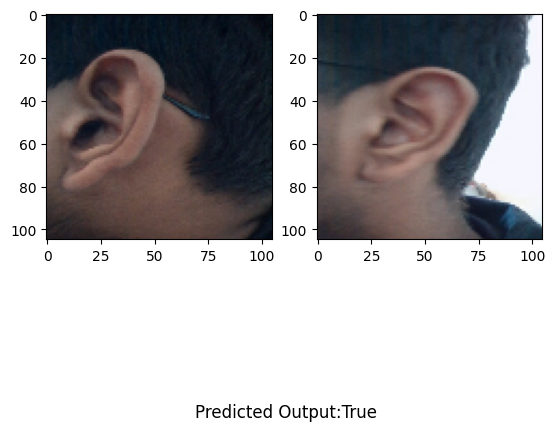

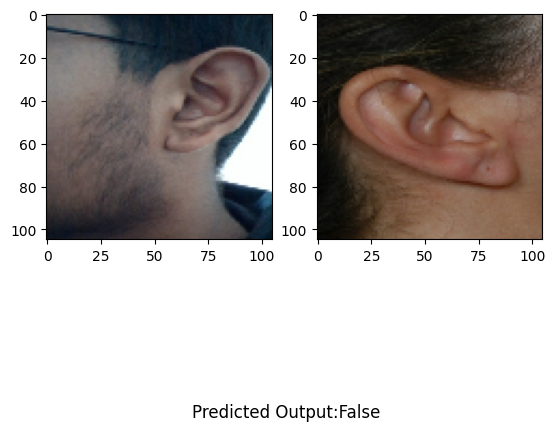

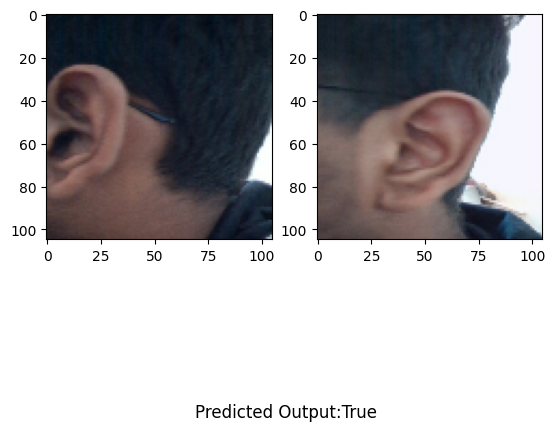

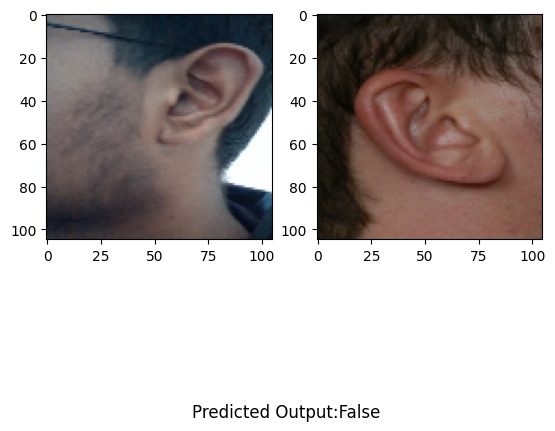

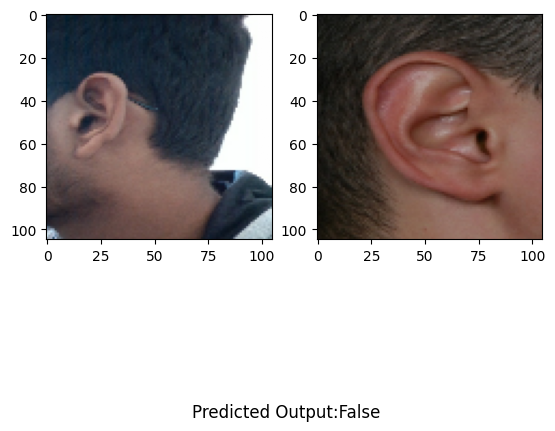

In [57]:
# plt.figure(figsize=(10,8))

for i in range(len(testinput)):
    
    # Set first subplot
    plt.subplot(1,2,1)
    plt.imshow(testinput[i])

    # Set second subplot
    plt.subplot(1,2,2)
    plt.imshow(testval[i])
    
    plt.text(0.5, -0.1, "Predicted Output:" +  "True" if ypred[i] else "Predicted Output:" +  "False", ha='center', va='center', fontsize=12, transform=plt.gcf().transFigure)


    # Renders cleanly
    plt.show()